## Using the Automated Method created to pinpoint times of fault and failures (i.e. anomalies) in machines.

In [9]:
from training import automated_training

In [10]:
trn = automated_training( input_data = 'machine_1.csv', window_size = 25, time_steps = 21, learning_rate = 0.0001, 
                         epoch = 200, batch_size = 64, sc_filepath = 'sc_model.bin', lstm_filepath = 'lstm_model.h5', 
                         thres_filepath = 'threshold.npy')

***The following parameters supplied for the automated training method is required for training of the LSTM model on the proposed dataset that would be used for training***

- Note: This automated method saves the **Scaler Model, LSTM Autoencoder Model and Threshold into different output files,** this is because these files will be required to pinpoint times of faults and failures in the future data sets given to this model.

- If the dataset is said to expand i.e. greater than 3000, the LSTM model will need to be retrained with a larger dataset since this model was only trained on the available dataset. 

- Also, we only use the 4 features / variables for each of the machines, we could have concatenated the features of all the 19 machines in the data repository but we noticed that the machines are different as a result they will react differently to the model, so sticking to one machine is required.

In [11]:
trn.LSTM_training()

Train on 2681 samples, validate on 298 samples
Epoch 1/200
2681/2681 [==============================] - 3s 1ms/step - loss: 0.9464 - val_loss: 1.3361
Epoch 2/200
2681/2681 [==============================] - 1s 557us/step - loss: 0.9430 - val_loss: 1.3333
Epoch 3/200
2681/2681 [==============================] - 1s 555us/step - loss: 0.9391 - val_loss: 1.3296
Epoch 4/200
2681/2681 [==============================] - 2s 585us/step - loss: 0.9341 - val_loss: 1.3244
Epoch 5/200
2681/2681 [==============================] - 2s 566us/step - loss: 0.9267 - val_loss: 1.3162
Epoch 6/200
2681/2681 [==============================] - 2s 560us/step - loss: 0.9143 - val_loss: 1.3007
Epoch 7/200
2681/2681 [==============================] - 2s 578us/step - loss: 0.8868 - val_loss: 1.2766
Epoch 8/200
2681/2681 [==============================] - 2s 568us/step - loss: 0.8574 - val_loss: 1.2448
Epoch 9/200
2681/2681 [==============================] - 1s 556us/step - loss: 0.8130 - val_loss: 1.1831
Epoch 10/2

2681/2681 [==============================] - 2s 583us/step - loss: 0.3643 - val_loss: 1.3306
Epoch 78/200
2681/2681 [==============================] - 2s 596us/step - loss: 0.3620 - val_loss: 1.2990
Epoch 79/200
2681/2681 [==============================] - 2s 572us/step - loss: 0.3599 - val_loss: 1.3129
Epoch 80/200
2681/2681 [==============================] - 2s 573us/step - loss: 0.3577 - val_loss: 1.2935
Epoch 81/200
2681/2681 [==============================] - 2s 583us/step - loss: 0.3556 - val_loss: 1.2681
Epoch 82/200
2681/2681 [==============================] - 2s 574us/step - loss: 0.3534 - val_loss: 1.2496
Epoch 83/200
2681/2681 [==============================] - 2s 583us/step - loss: 0.3514 - val_loss: 1.2280
Epoch 84/200
2681/2681 [==============================] - 2s 590us/step - loss: 0.3493 - val_loss: 1.1831
Epoch 85/200
2681/2681 [==============================] - 2s 640us/step - loss: 0.3474 - val_loss: 1.1749
Epoch 86/200
2681/2681 [==============================] - 2

Epoch 154/200
2681/2681 [==============================] - 2s 580us/step - loss: 0.2539 - val_loss: 0.4625
Epoch 155/200
2681/2681 [==============================] - 2s 602us/step - loss: 0.2535 - val_loss: 0.4535
Epoch 156/200
2681/2681 [==============================] - 2s 576us/step - loss: 0.2520 - val_loss: 0.4620
Epoch 157/200
2681/2681 [==============================] - 2s 580us/step - loss: 0.2516 - val_loss: 0.4510
Epoch 158/200
2681/2681 [==============================] - 2s 588us/step - loss: 0.2500 - val_loss: 0.4618
Epoch 159/200
2681/2681 [==============================] - 2s 569us/step - loss: 0.2497 - val_loss: 0.4488
Epoch 160/200
2681/2681 [==============================] - 2s 571us/step - loss: 0.2482 - val_loss: 0.4613
Epoch 161/200
2681/2681 [==============================] - 2s 584us/step - loss: 0.2479 - val_loss: 0.4483
Epoch 162/200
2681/2681 [==============================] - 2s 575us/step - loss: 0.2463 - val_loss: 0.4608
Epoch 163/200
2681/2681 [============

In [16]:
from anomaly_detection import automated_prediction

In [19]:
prd = automated_prediction(input_data = 'machine_2.csv', window_size = 25, time_steps = 21, 
                            scaler_filepath = 'sc_model.bin', lstm_filepath = 'lstm_model.h5', 
                            thres_filepath = 'threshold.npy')

***Here, I used the model trained on machine_1 dataset to predict times of anomalies / pinpoint times of fault and failures in machine_2 and machine_19, this should be ideally used for the future version of machine 1.***

- Normally, The trained method should be used on future version of machine 1 but in this case since we currently dont have future version of machine 1 will decided to predict on machine 2 based on what our model has learnt on machine 1.


- Lets further use it to pinpoint times of anomalies in machine 19

,Loss_mae,Threshold,Anomaly
2019-05-20,2.849049,2.59,True
2019-05-20,2.674228,2.59,True
2021-06-25,2.833818,2.59,True
2021-06-25,3.056141,2.59,True
2021-06-25,3.185790,2.59,True
2021-06-26,2.974647,2.59,True


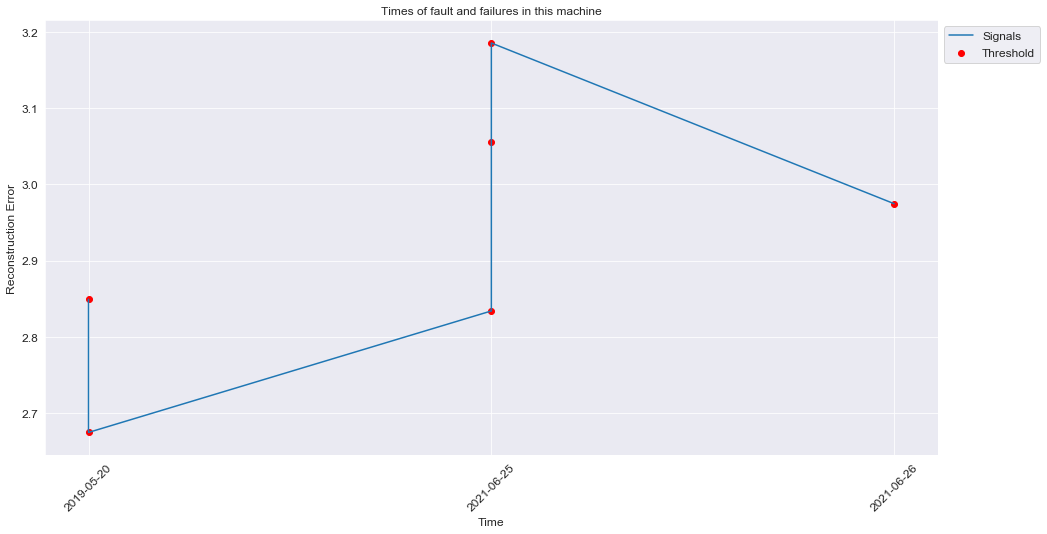

In [20]:
prd.LSTM_prediction()

In [21]:
prd = automated_prediction(input_data = 'machine_19.csv', window_size = 25, time_steps = 21, 
                            scaler_filepath = 'sc_model.bin', lstm_filepath = 'lstm_model.h5', 
                            thres_filepath = 'threshold.npy')

,Loss_mae,Threshold,Anomaly
2019-01-08,162.886346,2.59,True
2019-01-08,290.571748,2.59,True
2019-01-08,281.552871,2.59,True
2019-01-09,147.597056,2.59,True
2019-01-09,15.573094,2.59,True
2019-01-09,12.300561,2.59,True
2019-01-10,3.241735,2.59,True
2019-01-24,2.759933,2.59,True
2019-01-24,3.446847,2.59,True
2019-01-24,3.233693,2.59,True


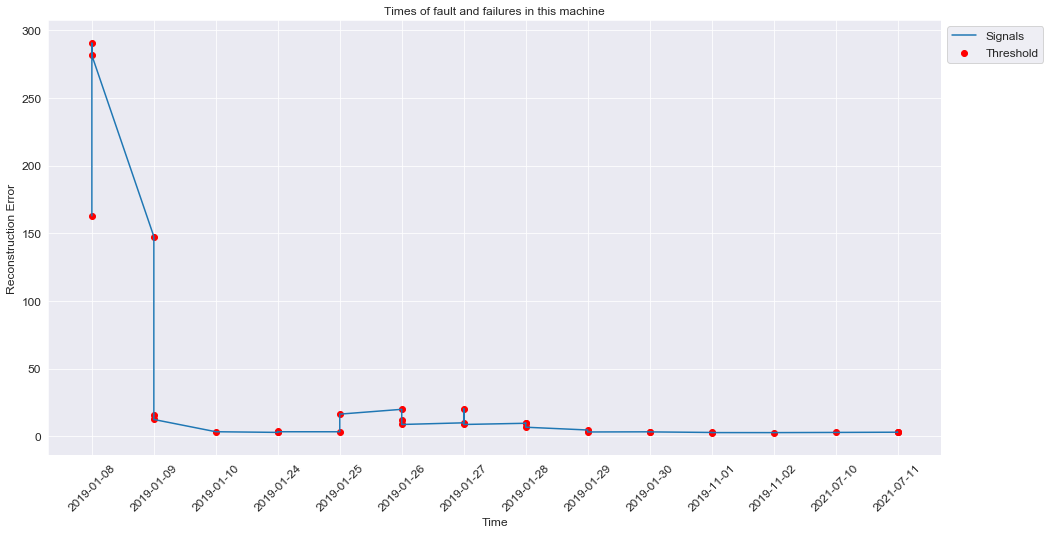

In [22]:
prd.LSTM_prediction()